In [2]:
from nautilus_lib.models.workspace import Workspace
from nautilus_lib.models.thing import Thing
from nautilus_lib.models.robot import Robot

In [3]:
t1 = Thing( position=(1,1,0) )
t2 = Thing( position=(1,2,0) )
t3 = Thing( position=(5,5,0), size=(1,1,1) )

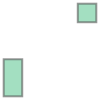

In [5]:
space = Workspace( size=(20, 20, 10) )

space.add_obstacle([t1, t2, t3])

space.map_presentation()

In [ ]:
if 1:
    from matplotlib import pyplot
    from shapely.geometry import *
    from descartes import PolygonPatch
    
    fig = pyplot.figure(num=1, dpi=100)

    ax = fig.add_subplot(111)

    l = []

    for obs in space._obstacle_list:
        patch = PolygonPatch( obs._polygon, facecolor='#cccccc', edgecolor='#999999' )
        ax.add_patch( patch )

        l.append( Point( obs.x, obs.y ) )

    l = LineString(l).buffer(0.01)

    patch1 = PolygonPatch( l )
    # patch2 = PolygonPatch( t2._polygon )

    # patch = PolygonPatch( m.map_presentation() )

    ax.add_patch(patch1)
    # ax.add_patch(patch2)
    # ax.add_patch( patch )

    ax.annotate('annotate', xy=(10, 10), xytext=(15, 15), arrowprops=dict(facecolor='black', shrink=0.01))
    
    ax.set_xlim(-1, space.size[0] + 1)
    ax.set_ylim(-1, space.size[1] + 1)
    ax.set_aspect(1)

    # fig.show()

    # pyplot.show()

# Planner Test

In [ ]:
from nautilus_lib.planner import Planner
from nautilus_lib.analyzer import Analyser

import nautilus_lib.viewer as vw

import networkx as nx

In [ ]:
t1 = Thing( position=(1,1,0) )
t2 = Thing( position=(8,4,0) )
t3 = Thing( position=(10,12,0) )

space = Workspace( size=(30, 20, 10) )
space.add_obstacle([t1, t2, t3])

start = Thing( position=(5,5,0), size=(1,1,1) )
end = Thing( position=(5,7,0), size=(1,1,1) )

test_case = {
    "start_position": start,
    "end_position": end,
    "workspace": space
}

planner = Planner()
try:
    path = planner.plan( test_case )
    print len(path)
    vw.view_path( planner, path )
except Exception, e:
    print e.message
 
start = Thing( position=(4,6,0), size=(1,1,1) )
end = Thing( position=(6,6,0), size=(1,1,1) )

test_case = {
    "start_position": start,
    "end_position": end,
    "workspace": space
}

planner2 = Planner()

try:
    path2 = planner2.plan( test_case )
    print len(path)
    vw.view_path( planner2, path2 )
except Exception, e:
    print e.message

In [ ]:

print path.nodes()
print path2.nodes()

print [ node for node in path.nodes() if node in path2 ]

In [ ]:
segments = Analyser.slipt( path )

for seg in segments:
    print seg.graph['start_id']
    print seg.graph['end_id']
    print len(seg)
    print '-----'

In [ ]:
import random
r = lambda: random.randint(0,255)
print('#%02X%02X%02X' % (r(),r(),r()))

# Executor Test

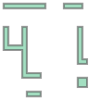

In [6]:
from nautilus_executor.utils import create_environment
# import nautilus_lib.viwer as vw

map_path = '/home/ramonmelo/Dropbox/Ramon_Projects/ramon-mestrado/impl/src/system/system_library/src/map_creator/maps/map1.json'

environment = create_environment( map_path )

space = environment['workspace']

start = environment['object_list'][0]['start']
end = environment['object_list'][0]['end']

# print type(environment['robot_dict'].values()[0]) is Thing

test_case = {
    "start_position": start,
    "end_position": end,
    "workspace": space
}

# vw.view_environment( environment )

space.map_presentation()

In [7]:
from nautilus_executor.utils import create_environment
from nautilus_executor.manager import ManagerSimple

import time

map_path = '/home/ramonmelo/Dropbox/Ramon_Projects/ramon-mestrado/impl/src/system/system_library/src/map_creator/maps/map1.json'
environment = create_environment( map_path )

start_time = time.time()

# ManagerSimple.execute( environment )

print "Total:", time.time() - start_time

Total: 6.31809234619e-05


In [9]:
from nautilus_executor.manager import ManagerSmart

ManagerSmart.execute( environment )

Total object: 207
Total robot: 451
Total: 658
